In [415]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p
import os
from pathlib import Path
from openpyxl import load_workbook

In [416]:
file_name_str = r"..\Refinitiv\Refinitiv_ESG & Financial Data (2012-2022) edited by KN (04032023).xlsx";
fin_file = pd.ExcelFile(file_name_str)
fin_file.sheet_names

['AU-404',
 'CN-934',
 'HK-349',
 'MY-331',
 'SG-92',
 'rm & rfr',
 'Description',
 'Variables',
 'Multiple rics']

In [417]:
keyword = "AU"

sheet_names = [sheet for sheet in fin_file.sheet_names if keyword.upper() in sheet.upper()]
sheet_names[0]

'AU-404'

In [418]:

# keyword = "AU"
# keyword = "CN"
# keyword = "HK"
# keyword = "MY"
keyword = "SG"

sheet_names = [sheet for sheet in fin_file.sheet_names if keyword.upper() in sheet.upper()]


findata_sheet = pd.read_excel(fin_file, sheet_name=sheet_names[0], index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="CN-934", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="HK-349", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="MY-331", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="SG-92", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)
# fin_data = pd.concat([fin_data.assign(sheet_name=name) for name, fin_data in findata_sheet.items()])


fin_data.head() 


,Unnamed: 1,Unnamed: 2,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
NaN,NaN,TR.CommonName,TR.TRESGScore,TR.EnvironmentPillarScore,TR.SocialPillarScore,TR.GovernancePillarScore,TR.GICSSector,TR.CompanyMarketCap(Curn=USD),TR.PE,TR.ROATotalAssetsPercent,TR.Volatility180D,TR.Volatility90D,TR.BetaFiveYear,TR.BetaDaily180D,TR.PriceToCFPerShare,TR.PriceToSalesPerShare,TR.PriceClose,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta 5 year,price to sales per share,NaN,price close,NaN,NaN,NaN
ZHEN.SI,FY2021,Zhen,31.24962,14.720754,19.691781,59.228607,Utilities,320150236.229288,9.751124,2.375322,151.057635,207.70113,0.444838,NaN,2.760117,0.494321,0.295,NaN
ZHEN.SI,FY2020,Zhen,35.504328,19.782151,20.416667,65.392923,Utilities,425752228.687917,6.443188,1.922827,151.057635,207.70113,0.444838,NaN,6.255107,0.834067,0.395,-0.291910
ZHEN.SI,FY2019,Zhen,23.715581,15.48284,27.935606,29.670001,Utilities,787060080.626845,14127.867363,1.050982,151.057635,207.70113,0.444838,NaN,NaN,1.387984,0.715,-0.593397


In [419]:
fin_data = fin_data.reset_index()
fin_data = fin_data.rename({'index': 'tkr',
                            'Unnamed: 1': 'year',
                            'Name':'Name'.lower()}, axis=1)
fin_data.drop([0,1], axis=0, inplace=True)

# remove first two letters from col1
fin_data['year'] = fin_data['year'].str.slice(start=2)

fin_data.head()

,tkr,year,Unnamed: 2,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
2,ZHEN.SI,2021,Zhen,31.24962,14.720754,19.691781,59.228607,Utilities,320150236.229288,9.751124,2.375322,151.057635,207.70113,0.444838,NaN,2.760117,0.494321,0.295,NaN
3,ZHEN.SI,2020,Zhen,35.504328,19.782151,20.416667,65.392923,Utilities,425752228.687917,6.443188,1.922827,151.057635,207.70113,0.444838,NaN,6.255107,0.834067,0.395,-0.291910
4,ZHEN.SI,2019,Zhen,23.715581,15.48284,27.935606,29.670001,Utilities,787060080.626845,14127.867363,1.050982,151.057635,207.70113,0.444838,NaN,NaN,1.387984,0.715,-0.593397
5,ZHEN.SI,2018,Zhen,NaN,NaN,NaN,NaN,Utilities,648925037.191312,10.065836,4.204143,151.057635,207.70113,0.444838,NaN,7.508354,1.376429,0.6,0.175353
6,ZHEN.SI,2017,Zhen,NaN,NaN,NaN,NaN,Utilities,487189790.856388,5.107678,5.266343,151.057635,207.70113,0.444838,NaN,7.475631,1.128792,0.46,0.265703


In [420]:
GICS = pd.ExcelFile("..\Sray\original dirty data\GICS sector by country (robusness check).xlsx")

sec_no = pd.read_excel(GICS, sheet_name="Sector No")
sec_no_pd = pd.DataFrame(sec_no)

sec_no_pd = sec_no_pd.rename({'sector' : 'sec'}, axis=1)
sec_no_pd

,sec,sec_no
0,Energy,1
1,Materials,2
2,Industrials,3
3,Consumer Discretionary,4
4,Consumer Staples,5
5,Health Care,6
6,Financials,7
7,Information Technology,8
8,Communication Services,9
9,Utilities,10


In [421]:
fin_data = pd.merge(fin_data, sec_no_pd, on=['sec'])
fin_data = fin_data.drop(['sec'], axis=1)
fin_data.head()

,tkr,year,Unnamed: 2,esg,e,s,g,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln,sec_no
0,ZHEN.SI,2021,Zhen,31.24962,14.720754,19.691781,59.228607,320150236.229288,9.751124,2.375322,151.057635,207.70113,0.444838,NaN,2.760117,0.494321,0.295,NaN,10
1,ZHEN.SI,2020,Zhen,35.504328,19.782151,20.416667,65.392923,425752228.687917,6.443188,1.922827,151.057635,207.70113,0.444838,NaN,6.255107,0.834067,0.395,-0.291910,10
2,ZHEN.SI,2019,Zhen,23.715581,15.48284,27.935606,29.670001,787060080.626845,14127.867363,1.050982,151.057635,207.70113,0.444838,NaN,NaN,1.387984,0.715,-0.593397,10
3,ZHEN.SI,2018,Zhen,NaN,NaN,NaN,NaN,648925037.191312,10.065836,4.204143,151.057635,207.70113,0.444838,NaN,7.508354,1.376429,0.6,0.175353,10
4,ZHEN.SI,2017,Zhen,NaN,NaN,NaN,NaN,487189790.856388,5.107678,5.266343,151.057635,207.70113,0.444838,NaN,7.475631,1.128792,0.46,0.265703,10


In [422]:
firm_no_pd = pd.DataFrame(fin_data['tkr'])
firm_no_pd = firm_no_pd.sort_values(['tkr'])
firm_no_pd = firm_no_pd.drop_duplicates()
firm_no_pd = firm_no_pd.reset_index(drop=True)
firm_no_pd.index += 1
firm_no_pd.index.name = 'firm_no'
firm_no_pd = firm_no_pd.reset_index()
firm_no_pd.tail()

,firm_no,tkr
87,88,WLIL.SI
88,89,WTHS.SI
89,90,YAZG.SI
90,91,YNLG.SI
91,92,ZHEN.SI


In [423]:
fin_data = pd.merge(fin_data, firm_no_pd, on=['tkr'], how='left')
fin_data.head()


,tkr,year,Unnamed: 2,esg,e,s,g,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln,sec_no,firm_no
0,ZHEN.SI,2021,Zhen,31.24962,14.720754,19.691781,59.228607,320150236.229288,9.751124,2.375322,151.057635,207.70113,0.444838,NaN,2.760117,0.494321,0.295,NaN,10,92
1,ZHEN.SI,2020,Zhen,35.504328,19.782151,20.416667,65.392923,425752228.687917,6.443188,1.922827,151.057635,207.70113,0.444838,NaN,6.255107,0.834067,0.395,-0.291910,10,92
2,ZHEN.SI,2019,Zhen,23.715581,15.48284,27.935606,29.670001,787060080.626845,14127.867363,1.050982,151.057635,207.70113,0.444838,NaN,NaN,1.387984,0.715,-0.593397,10,92
3,ZHEN.SI,2018,Zhen,NaN,NaN,NaN,NaN,648925037.191312,10.065836,4.204143,151.057635,207.70113,0.444838,NaN,7.508354,1.376429,0.6,0.175353,10,92
4,ZHEN.SI,2017,Zhen,NaN,NaN,NaN,NaN,487189790.856388,5.107678,5.266343,151.057635,207.70113,0.444838,NaN,7.475631,1.128792,0.46,0.265703,10,92


In [424]:
print (fin_data.columns)

Index(['tkr', 'year', 'Unnamed: 2', 'esg', 'e', 's', 'g', 'mv', 'pe', 'roa',
       'vol_180d', 'vol_90d', 'beta_5y', 'beta_6m', 'pcf', 'ps', 'px',
       'ret_ln', 'sec_no', 'firm_no'],
      dtype='object')


In [425]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [426]:
fin_data = fin_data.rename({'name': 'firm_name',
                            'Unnamed: 2': 'firm_name',
                            # 'Tkr & Exch': 'tkr',
                            # 'Sec_no': 'sec_no',
                            # 'Dates': 'date',
                            # 'Year':'Year'.lower(),
                            # 'PE_RATIO': 'pe',
                            # 'BETA_RAW_OVERRIDABLE': 'beta',
                            # 'CF_FREE_CASH_FLOW': 'fcf',
                            'pcf': 'fcf',
                            'ps':'sp'
                            # 'RETURN_ON_ASSET': 'roa',
                            # 'PX_LAST': 'px', 
                            # 'MARKET_RETURN': 'ret', 
                            # 'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            # 'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            # 'TRAIL_12M_SALES_PER_SH': 'sales'.lower(), 
                            # 'IS_EPS': 'IS_EPS'.lower(),
                            # 'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            # 'VOLATILITY_180D':'vol_180d',
                            # 'VOLATILITY_360D':'vol_360d'
                            }, axis=1)
fin_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,fcf,sp,px,ret_ln,sec_no,firm_no,es,eg,sg,esg_cubic
0,ZHEN.SI,2021,Zhen,31.24962,14.720754,19.691781,59.228607,320150236.229288,9.751124,2.375322,...,2.760117,0.494321,0.295,NaN,10,92,289.877859,871.889744,1166.316743,30516.465393
1,ZHEN.SI,2020,Zhen,35.504328,19.782151,20.416667,65.392923,425752228.687917,6.443188,1.922827,...,6.255107,0.834067,0.395,-0.291910,10,92,403.885586,1293.612682,1335.105505,44755.238212
2,ZHEN.SI,2019,Zhen,23.715581,15.48284,27.935606,29.670001,787060080.626845,14127.867363,1.050982,...,NaN,1.387984,0.715,-0.593397,10,92,432.522509,459.375864,828.849453,13338.325121
3,ZHEN.SI,2018,Zhen,NaN,NaN,NaN,NaN,648925037.191312,10.065836,4.204143,...,7.508354,1.376429,0.6,0.175353,10,92,NaN,NaN,NaN,NaN
4,ZHEN.SI,2017,Zhen,NaN,NaN,NaN,NaN,487189790.856388,5.107678,5.266343,...,7.475631,1.128792,0.46,0.265703,10,92,NaN,NaN,NaN,NaN


In [427]:
fin_data['ep'] = 1/fin_data['pe']
# fin_data['sp'] = fin_data['sales'] / fin_data['px']
fin_data['cfp'] = fin_data['fcf'] /fin_data['px']
fin_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,px,ret_ln,sec_no,firm_no,es,eg,sg,esg_cubic,ep,cfp
0,ZHEN.SI,2021,Zhen,31.24962,14.720754,19.691781,59.228607,320150236.229288,9.751124,2.375322,...,0.295,NaN,10,92,289.877859,871.889744,1166.316743,30516.465393,0.102552,9.356327
1,ZHEN.SI,2020,Zhen,35.504328,19.782151,20.416667,65.392923,425752228.687917,6.443188,1.922827,...,0.395,-0.291910,10,92,403.885586,1293.612682,1335.105505,44755.238212,0.155203,15.835715
2,ZHEN.SI,2019,Zhen,23.715581,15.48284,27.935606,29.670001,787060080.626845,14127.867363,1.050982,...,0.715,-0.593397,10,92,432.522509,459.375864,828.849453,13338.325121,0.000071,NaN
3,ZHEN.SI,2018,Zhen,NaN,NaN,NaN,NaN,648925037.191312,10.065836,4.204143,...,0.6,0.175353,10,92,NaN,NaN,NaN,NaN,0.099346,12.513923
4,ZHEN.SI,2017,Zhen,NaN,NaN,NaN,NaN,487189790.856388,5.107678,5.266343,...,0.46,0.265703,10,92,NaN,NaN,NaN,NaN,0.195784,16.251372


In [428]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[10, 11, 3, 5, 8, 7, 6, 9, 4, 1]


10

In [429]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [430]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [431]:
fin_data.dtypes

tkr           object
year          object
firm_name     object
esg           object
e             object
s             object
g             object
mv            object
pe            object
roa           object
vol_180d      object
vol_90d       object
beta_5y       object
beta_6m       object
fcf           object
sp            object
px            object
ret_ln       float64
sec_no         int64
firm_no        int64
es            object
eg            object
sg            object
esg_cubic     object
ep            object
cfp           object
dtype: object

In [432]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

'''change the year column data type'''
fin_data['year'] = fin_data['year'].astype(float)

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']>=initial_year& (fin_data['year']<=stop_year))].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year'] == year)].copy()

            # temp_dataframe = fin_data.copy()

            
            temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



In [433]:
len(companies_sec)

70

In [434]:
companies_sec[3]

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,ep,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
874,MOIL.SI,2017.0,Mandarin Oriental International Ltd,NaN,NaN,NaN,NaN,2573309566.32,41.497152,2.808699,...,0.024098,9.302554,0.043069,0.020855,4.565297,1.920524,6.853578,4.470617,4.979294,1.932443
885,HPPS.SI,2017.0,Hotel Properties Ltd,NaN,NaN,NaN,NaN,1525539101.11418,15.290553,5.616565,...,0.0654,1.693572,0.043069,0.020855,4.565297,1.920524,6.853578,4.470617,4.979294,1.932443
895,GENS.SI,2017.0,Genting Singapore Ltd,64.223327,75.422076,71.015281,43.956522,11847136124.6092,25.182622,6.512617,...,0.03971,9.564609,0.043069,0.020855,4.565297,1.920524,6.853578,4.470617,4.979294,1.932443


In [435]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,ep,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
904,GOLD.SI,2017.0,Golden Energy and Resources Ltd,NaN,NaN,NaN,NaN,379894388.786967,5.279405,16.382706,...,0.189415,12.466107,0.162142,0.038570,0.194125,0.227585,12.017363,0.634619,10.801095,7.893590
914,CNAO.SI,2017.0,China Aviation Oil (Singapore) Corporation Ltd,NaN,NaN,NaN,NaN,673776066.397593,7.414617,5.219484,...,0.134869,11.56862,0.162142,0.038570,0.194125,0.227585,12.017363,0.634619,10.801095,7.893590
445,YAZG.SI,2017.0,Yangzijiang Shipbuilding Holdings Ltd,19.246868,16.488156,14.62036,28.623188,4368423831.60098,5.019571,7.308918,...,0.19922,6.704589,0.065081,0.048814,1.815505,1.431004,9.300856,14.976229,5.883379,5.247748
455,STEG.SI,2017.0,Singapore Technologies Engineering Ltd,53.841487,65.038337,49.438443,51.599034,7611855486.59238,20.089974,6.419891,...,0.049776,4.184607,0.065081,0.048814,1.815505,1.431004,9.300856,14.976229,5.883379,5.247748
465,SPOS.SI,2017.0,Singapore Post Ltd,32.30261,9.757615,29.968226,62.391304,2109557325.20751,NaN,1.166731,...,NaN,15.098214,0.065081,0.048814,1.815505,1.431004,9.300856,14.976229,5.883379,5.247748


In [436]:
new_companies_data.dtypes

tkr              object
year            float64
firm_name        object
esg              object
e                object
s                object
g                object
mv               object
pe               object
roa              object
vol_180d         object
vol_90d          object
beta_5y          object
beta_6m          object
fcf              object
sp               object
px               object
ret_ln          float64
sec_no            int64
firm_no           int64
es               object
eg               object
sg               object
esg_cubic        object
ep               object
cfp              object
ep_sec_mean     float64
ep_sec_sd       float64
sp_sec_mean     float64
sp_sec_sd       float64
cfp_sec_mean    float64
cfp_sec_sd      float64
roa_sec_mean    float64
roa_sec_sd      float64
dtype: object

In [437]:
try:
    new_companies_data['ep_z'] = new_companies_data.apply(
        lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['ep_z'] = np.nan

try:
    new_companies_data['sp_z'] = new_companies_data.apply(
        lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['sp_z'] = np.nan

try:
    new_companies_data['cfp_z'] = new_companies_data.apply(
        lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['cfp_z'] = np.nan


# read the column FROM ep_z to cfp_z
col = new_companies_data.loc[:, "ep_z":"cfp_z"]

new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan


try:
    new_companies_data['esg_value'] = new_companies_data.apply(
        lambda row: (row.esg + row.value)/2, axis=1)
except ZeroDivisionError:
    new_companies_data['esg_value'] = np.nan


In [438]:
new_companies_data.head()

,tkr,year,firm_name,esg,e,s,g,mv,pe,roa,...,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd,ep_z,sp_z,cfp_z,value,roa_z,esg_value
904,GOLD.SI,2017.0,Golden Energy and Resources Ltd,NaN,NaN,NaN,NaN,379894388.786967,5.279405,16.382706,...,12.017363,0.634619,10.801095,7.893590,0.707107,0.707107,0.707107,0.707107,0.707107,NaN
914,CNAO.SI,2017.0,China Aviation Oil (Singapore) Corporation Ltd,NaN,NaN,NaN,NaN,673776066.397593,7.414617,5.219484,...,12.017363,0.634619,10.801095,7.893590,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,NaN
445,YAZG.SI,2017.0,Yangzijiang Shipbuilding Holdings Ltd,19.246868,16.488156,14.62036,28.623188,4368423831.60098,5.019571,7.308918,...,9.300856,14.976229,5.883379,5.247748,2.747966,-0.706697,-0.173359,0.622637,0.271648,9.934752
455,STEG.SI,2017.0,Singapore Technologies Engineering Ltd,53.841487,65.038337,49.438443,51.599034,7611855486.59238,20.089974,6.419891,...,9.300856,14.976229,5.883379,5.247748,-0.313538,-0.198556,-0.341625,-0.284573,0.102237,26.778457
465,SPOS.SI,2017.0,Singapore Post Ltd,32.30261,9.757615,29.968226,62.391304,2109557325.20751,NaN,1.166731,...,9.300856,14.976229,5.883379,5.247748,NaN,0.125742,0.387104,0.256423,-0.898795,16.279517


In [439]:
'''Count the number of columns'''
new_companies_data.shape[1]

40

In [440]:

#sorting the company
# new_companies_data['date'] = pd.to_datetime(
#     new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firm_name", "year"])

# #arrange according to the Portfolio-no normalization
# new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no', 'year',
#                                             'date', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 
#                                             'ep', 'sp', 'cfp','ep_sec_mean', 'ep_sec_sd', 'sp_sec_mean', 
#                                             'sp_sec_sd', 'cfp_sec_mean','cfp_sec_sd', 'roa_sec_mean', 
#                                             'roa_sec_sd', 'ep_z', 'sp_z', 'cfp_z', 'value', 'roa_z', 'esg_value'
#                                             'px','ret','historical_market_cap', 'sales','is_eps', 'fcf','pe', 
#                                             'return_com_eqy', 'roa', 'roa_sec_mean', 'roa_sec_sd', 'roa_z','vol_180d', 
#                                             'vol_360d','beta']]

new_companies_data = new_companies_data[['firm_no','firm_name', 'tkr', 'sec_no','year',
                                            'esg', 'e', 's', 
                                            'g', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px', 'fcf', 'pe', 'beta_5y', 'beta_6m', 'roa', 'vol_180d', 'mv', 'vol_90d',
                                            'ret_ln', 'ep', 'ep_sec_mean', 'ep_sec_sd', 'ep_z', 
                                            'sp', 'sp_sec_mean', 'sp_sec_sd', 'sp_z', 
                                            'cfp', 'cfp_sec_mean', 'cfp_sec_sd', 'cfp_z', 
                                            'value', 'roa_sec_mean', 'roa_sec_sd', 'roa_z', 'esg_value']]

new_companies_data.head()


,firm_no,firm_name,tkr,sec_no,year,esg,e,s,g,es,...,sp_z,cfp,cfp_sec_mean,cfp_sec_sd,cfp_z,value,roa_sec_mean,roa_sec_sd,roa_z,esg_value
914,14,China Aviation Oil (Singapore) Corporation Ltd,CNAO.SI,1,2017.0,NaN,NaN,NaN,NaN,NaN,...,-0.707107,11.56862,12.017363,0.634619,-0.707107,-7.071068e-01,10.801095,7.893590,-0.707107,NaN
913,14,China Aviation Oil (Singapore) Corporation Ltd,CNAO.SI,1,2018.0,NaN,NaN,NaN,NaN,NaN,...,-0.707107,NaN,24.357731,NaN,NaN,0.000000e+00,6.932902,2.354634,-0.707107,NaN
912,14,China Aviation Oil (Singapore) Corporation Ltd,CNAO.SI,1,2019.0,18.956321,5.950305,18.58385,32.960784,110.579577,...,-0.707107,3.855826,8.784869,6.970720,-0.707107,-2.357023e-01,4.419383,1.756878,0.707107,9.360309
911,14,China Aviation Oil (Singapore) Corporation Ltd,CNAO.SI,1,2020.0,20.163526,7.326079,21.149379,31.933677,154.942011,...,-0.707107,NaN,8.362799,NaN,NaN,-1.110223e-16,2.870669,0.166325,0.707107,10.081763
910,14,China Aviation Oil (Singapore) Corporation Ltd,CNAO.SI,1,2021.0,25.214499,13.774284,34.274059,23.295721,472.100623,...,-0.707107,NaN,1.798649,NaN,NaN,-7.071068e-01,9.659823,10.327521,-0.707107,12.253696


In [441]:
# new_companies_data.to_excel("SG_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = ""
new_companies_data_folder_path = "..\Refinitiv\Analysis\\" + keyword
describe_df_path = "..\Refinitiv\Analysis\\" + keyword + "\\" + keyword +"_Descriptive Statistics.xlsx"

try:
    os.makedirs(new_companies_data_folder_path)
except FileExistsError:
    # directory already exists
    pass


new_companies_data.to_excel(new_companies_data_folder_path + "\\" + keyword +"_Refinitiv_fin_data_portfolio.xlsx" , sheet_name="main", index=False)



## **Descriptive Section**

In [442]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
describe_df= new_companies_data.describe(include="all")
print(describe_df)

describe_df.to_excel( describe_df_path, sheet_name="main")


           firm_no              firm_name      tkr      sec_no         year  \
count   294.000000                    294      294  294.000000   294.000000   
unique         NaN                     52       52         NaN          NaN   
top            NaN  Sheng Siong Group Ltd  SHEN.SI         NaN          NaN   
freq           NaN                      6        6         NaN          NaN   
mean     52.608844                    NaN      NaN    5.493197  2019.346939   
std      25.663750                    NaN      NaN    2.382735     1.642661   
min       1.000000                    NaN      NaN    1.000000  2017.000000   
25%      32.000000                    NaN      NaN    3.000000  2018.000000   
50%      54.500000                    NaN      NaN    5.000000  2019.000000   
75%      75.000000                    NaN      NaN    7.000000  2021.000000   
max      92.000000                    NaN      NaN   10.000000  2022.000000   

               esg      e          s           g   

## **Total number of companies in each sector**

In [443]:
df_sec_company_count = pd.DataFrame(new_companies_data.groupby(['year','sec_no' ])['tkr'].nunique())
df_sec_company_count.head()

tkr
year   sec_no     
2017.0 1         2
       3        14
       4         3
       5        10
       6         5

In [444]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
df_sec_company_count.to_excel(writer, sheet_name='sec_no_count')
writer.close()

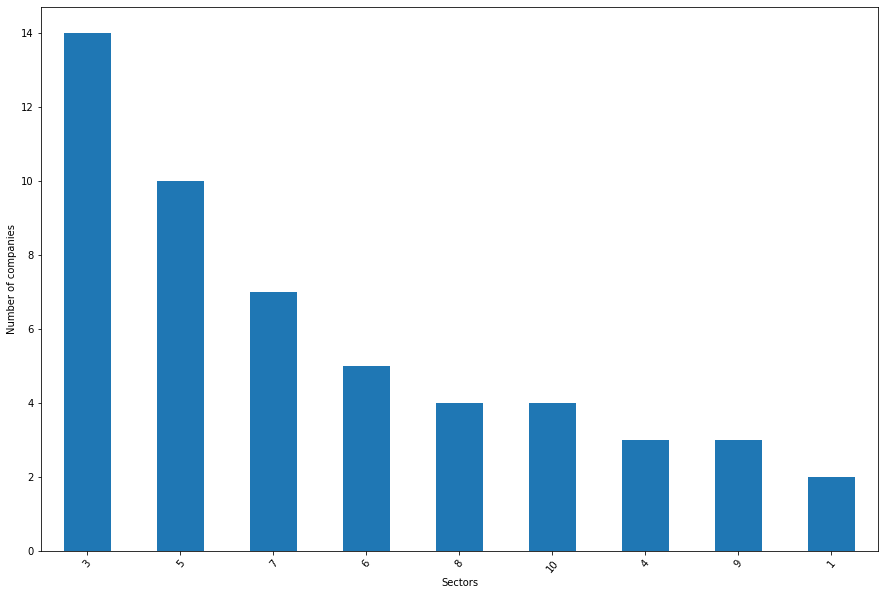

In [445]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [446]:
# new_companies_data.drop(['date', 'firm_name','tkr','sec_no' ], axis=1, inplace=True)

In [447]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

firm_no           int64
firm_name        object
tkr              object
sec_no            int64
year            float64
esg              object
e                object
s                object
g                object
es               object
eg               object
sg               object
esg_cubic        object
px              float64
fcf              object
pe               object
beta_5y          object
beta_6m          object
roa              object
vol_180d         object
mv               object
vol_90d          object
ret_ln          float64
ep               object
ep_sec_mean     float64
ep_sec_sd       float64
ep_z            float64
sp               object
sp_sec_mean     float64
sp_sec_sd       float64
sp_z            float64
cfp              object
cfp_sec_mean    float64
cfp_sec_sd      float64
cfp_z           float64
value           float64
roa_sec_mean    float64
roa_sec_sd      float64
roa_z           float64
esg_value       float64
dtype: object

In [448]:
# kurtosis(new_companies_data, fisher = True)

In [449]:
kurt = pd.DataFrame(new_companies_data.kurtosis())
kurt = kurt.reset_index()
kurt = kurt.rename({0:"kurtosis", "index": "variable"}, axis=1)
kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]
kurt

C:\Users\heihe\AppData\Local\Temp/ipykernel_37348/2506432064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = pd.DataFrame(new_companies_data.kurtosis())
C:\Users\heihe\AppData\Local\Temp/ipykernel_37348/2506432064.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]


,variable,kurtosis
0,firm_no,-1.127785
1,sec_no,-0.850620
2,year,-1.197650
3,esg,-0.754418
4,e,-1.117253
5,s,-0.687283
6,g,-0.539576
7,es,-0.598181
8,eg,-0.211629
9,sg,-0.162048


In [450]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
kurt.to_excel(writer, sheet_name='kurtosis', index=False)
writer.close()